In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [151]:
file_path = 'top_three_stations_data.csv'
df = pd.read_csv(file_path)
target_station = ['W 21 St & 6 Ave', 'West St & Chambers St', '11 Ave & W 41 St']
# Convert str to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create a filter for time
morning_time= (df['started_at'].dt.hour >= 6) & (df['started_at'].dt.hour < 12)
afternoon_time = (df['started_at'].dt.hour >= 16) & (df['started_at'].dt.hour < 23)

# Filter Out required data
df = df[morning_time | afternoon_time]

df['start_time_interval'] = df['started_at'].dt.floor('10T')
df['end_time_interval'] = df['ended_at'].dt.floor('10T')


# # Split into morning and afternoon parts
morning_df = df[morning_time]
afternoon_df = df[afternoon_time]

station_w21St6ave_morning = morning_df[(morning_df['start_station_name'] == 'W 21 St & 6 Ave') | (morning_df['end_station_name'] == 'W 21 St & 6 Ave')]
station_w21St6ave_morning



C:\Users\steve\AppData\Local\Temp\ipykernel_31740\3156292589.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  morning_df = df[morning_time]
C:\Users\steve\AppData\Local\Temp\ipykernel_31740\3156292589.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afternoon_df = df[afternoon_time]


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,start_time_interval,end_time_interval
1,1A16C593C6EB804E,classic_bike,2023-07-19 06:27:35,2023-07-19 06:31:28,W 21 St & 6 Ave,6140.05,W 20 St & 10 Ave,6306.01,40.741740,-73.994156,40.745686,-74.005141,member,2,2023-07-19 06:20:00,2023-07-19 06:30:00
10,46B81A6426E7AE83,classic_bike,2023-07-12 11:59:48,2023-07-12 12:05:42,W 21 St & 6 Ave,6140.05,W 29 St & 9 Ave,6416.06,40.741740,-73.994156,40.750073,-73.998393,member,2,2023-07-12 11:50:00,2023-07-12 12:00:00
14,DEB00C17485C30BA,classic_bike,2023-07-05 10:03:20,2023-07-05 10:07:44,W 12 St & Hudson St,5997.10,W 21 St & 6 Ave,6140.05,40.737554,-74.005170,40.741740,-73.994156,member,2,2023-07-05 10:00:00,2023-07-05 10:00:00
18,F29D6DCBD6916157,classic_bike,2023-07-27 11:39:11,2023-07-27 13:13:27,5 Ave & E 72 St,7100.07,W 21 St & 6 Ave,6140.05,40.772828,-73.966853,40.741740,-73.994156,casual,3,2023-07-27 11:30:00,2023-07-27 13:10:00
19,A7A5705879556308,classic_bike,2023-07-27 11:40:34,2023-07-27 13:13:37,5 Ave & E 72 St,7100.07,W 21 St & 6 Ave,6140.05,40.772828,-73.966853,40.741740,-73.994156,casual,3,2023-07-27 11:40:00,2023-07-27 13:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53661,3179A2B537FD914B,classic_bike,2023-07-07 11:25:50,2023-07-07 11:32:18,W 21 St & 6 Ave,6140.05,W 22 St & 10 Ave,6306.06,40.741740,-73.994156,40.746920,-74.004519,member,4,2023-07-07 11:20:00,2023-07-07 11:30:00
53670,43F4CEE35FC4D2E9,classic_bike,2023-07-21 06:42:35,2023-07-21 06:49:03,W 21 St & 6 Ave,6140.05,Washington Pl & Broadway,5755.01,40.741804,-73.994128,40.729039,-73.994046,member,4,2023-07-21 06:40:00,2023-07-21 06:40:00
53736,6A7D1E40A36ED11D,classic_bike,2023-07-14 06:44:23,2023-07-14 07:02:43,W 21 St & 6 Ave,6140.05,Central Park W & W 97 St,7538.18,40.773403,-73.977927,40.792495,-73.964171,member,4,2023-07-14 06:40:00,2023-07-14 07:00:00
53743,91A1238938A6A6A1,classic_bike,2023-07-21 10:40:55,2023-07-21 11:19:15,W 21 St & 6 Ave,6140.05,Central Ave & Woodbine St,4632.10,40.741848,-73.994220,40.692960,-73.916050,casual,4,2023-07-21 10:40:00,2023-07-21 11:10:00


In [152]:
# df = pd.read_csv(file_path)
# df.value_counts('start_station_name')[:3]

## W 21 St & 6 Ave

In [153]:
out_count_per_5_min = station_w21St6ave_morning[station_w21St6ave_morning['start_station_name'] == 'W 21 St & 6 Ave']['start_time_interval'].value_counts()
in_count_per_5_min = station_w21St6ave_morning[station_w21St6ave_morning['end_station_name'] == 'W 21 St & 6 Ave']['end_time_interval'].value_counts()

In [154]:
station_w21St6ave_count = pd.concat([in_count_per_5_min, out_count_per_5_min], axis=1).rename(columns = {'end_time_interval': 'in_count', 'start_time_interval': 'out_count'})
station_w21St6ave_count.fillna(0, inplace=True)
station_w21St6ave_count['final_count'] = station_w21St6ave_count['in_count'] - station_w21St6ave_count['out_count']
station_w21St6ave_count['final_count'] = station_w21St6ave_count['final_count'].astype(int)
station_w21St6ave_count

,in_count,out_count,final_count
2023-07-03 06:20:00,1.0,0.0,1
2023-07-03 06:30:00,0.0,1.0,-1
2023-07-03 06:40:00,2.0,1.0,1
2023-07-03 06:50:00,2.0,0.0,2
2023-07-03 07:30:00,2.0,1.0,1
...,...,...,...
2023-07-31 11:20:00,4.0,5.0,-1
2023-07-31 11:30:00,6.0,6.0,0
2023-07-31 11:40:00,1.0,3.0,-2
2023-07-31 11:50:00,6.0,0.0,6


In [155]:
station_w21St6ave_dict = dict(sorted(Counter(station_w21St6ave_count['final_count']).items()))
station_w21St6ave_dict

{-11: 1,
 -7: 2,
 -6: 5,
 -5: 9,
 -4: 14,
 -3: 31,
 -2: 65,
 -1: 88,
 0: 103,
 1: 138,
 2: 103,
 3: 68,
 4: 53,
 5: 31,
 6: 29,
 7: 16,
 8: 4,
 9: 6,
 10: 2,
 11: 2}

<BarContainer object of 20 artists>

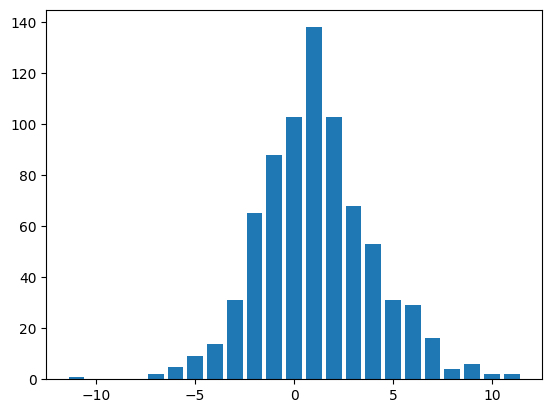

In [156]:
plt.bar(station_w21St6ave_dict.keys(), station_w21St6ave_dict.values())

In [157]:
# station_w21St6ave_dict

In [158]:
# station with 52 docks
docks = 52

def create_transition_matrix(docks, bike_change_dict):
    changes = list(bike_change_dict.keys())
    frequency = list(bike_change_dict.values())
    matrix = np.zeros((docks + 1, docks + 1))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (j - i) in changes:
                matrix[i][j] = bike_change_dict[j - i]
        matrix[i] = matrix[i]/sum(matrix[i])
    return matrix

def verify_row_sum_to_one(matrix):
    row_sums = np.sum(matrix, axis=1)
    return np.allclose(row_sums, 1)

station_w21St6ave_matrix = create_transition_matrix(docks, station_w21St6ave_dict)
station_w21St6ave_matrix

array([[0.18558559, 0.24864865, 0.18558559, ..., 0.        , 0.        ,
        0.        ],
       [0.13685848, 0.16018663, 0.21461897, ..., 0.        , 0.        ,
        0.        ],
       [0.09180791, 0.12429379, 0.14548023, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.1842576 , 0.24686941,
        0.1842576 ],
       [0.        , 0.        , 0.        , ..., 0.19298246, 0.22587719,
        0.30263158],
       [0.        , 0.        , 0.        , ..., 0.20440252, 0.27672956,
        0.32389937]])

In [159]:
verify_row_sum_to_one(station_w21St6ave_matrix)

True

In [160]:
create_transition_matrix(docks, station_w21St6ave_dict).shape

(53, 53)

In [161]:
station_w21St6ave_matrix

array([[0.18558559, 0.24864865, 0.18558559, ..., 0.        , 0.        ,
        0.        ],
       [0.13685848, 0.16018663, 0.21461897, ..., 0.        , 0.        ,
        0.        ],
       [0.09180791, 0.12429379, 0.14548023, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.1842576 , 0.24686941,
        0.1842576 ],
       [0.        , 0.        , 0.        , ..., 0.19298246, 0.22587719,
        0.30263158],
       [0.        , 0.        , 0.        , ..., 0.20440252, 0.27672956,
        0.32389937]])

In [162]:
def calculate_stationary_distribution(transition_matrix):
    # Transpose the transition matrix to find left eigenvectors
    transposed_matrix = np.transpose(transition_matrix)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

    # Find the index corresponding to the eigenvalue 1
    index = np.where(np.isclose(eigenvalues, 1))[0][0]

    # Extract the corresponding eigenvector
    stationary_distribution = np.real(eigenvectors[:, index])

    # Normalize the stationary distribution to sum to 1
    stationary_distribution /= np.sum(stationary_distribution)

    return stationary_distribution

stationary_distribution = calculate_stationary_distribution(station_w21St6ave_matrix)
print("Stationary Distribution:", stationary_distribution)

Stationary Distribution: [1.29706981e-07 2.04215260e-07 2.94761190e-07 4.05730757e-07
 5.48499869e-07 7.31878434e-07 9.73072943e-07 1.28817682e-06
 1.70066864e-06 2.24456142e-06 2.96042193e-06 3.90364371e-06
 5.14601542e-06 6.78365943e-06 8.94239997e-06 1.17880174e-05
 1.55391625e-05 2.04838810e-05 2.70020363e-05 3.55944847e-05
 4.69203418e-05 6.18514946e-05 8.15344671e-05 1.07481068e-04
 1.41681101e-04 1.86761850e-04 2.46186372e-04 3.24534447e-04
 4.27810135e-04 5.63928360e-04 7.43442319e-04 9.79435898e-04
 1.29147974e-03 1.70329051e-03 2.24639814e-03 2.96110507e-03
 3.90233330e-03 5.14125402e-03 6.78103513e-03 8.93875821e-03
 1.17726088e-02 1.55606643e-02 1.99619871e-02 2.64482056e-02
 3.51233975e-02 4.67414488e-02 6.10072009e-02 7.82090316e-02
 9.85501654e-02 1.22541651e-01 1.44558020e-01 1.52891804e-01
 1.49609929e-01]


<BarContainer object of 53 artists>

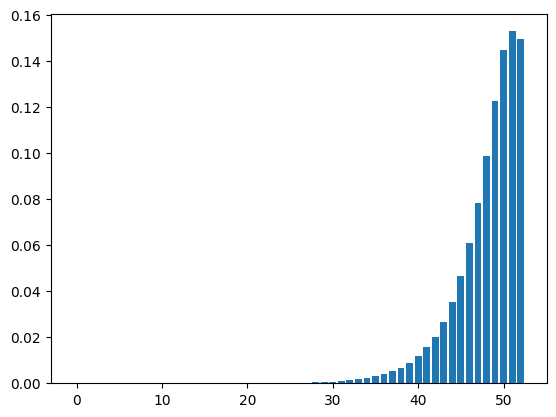

In [163]:
plt.bar(range(53), stationary_distribution)

In [164]:
def exp_cal(stationary_distribution):
    expectation = 0
    for num in range(53):
        expectation += num * stationary_distribution[num]
    return expectation

result = exp_cal(stationary_distribution)
print(result)

48.083194233752735
